# Tutorial 03: Writing first EMNIST Program
By Rahul GAWAI

## Introduction
This program is inspired by [GitHub](https://github.com/Hvass-Labs/TensorFlow-Tutorials)

Python used: 3.6
TensorFlow version: 1.10

## Importing packages

In [1]:
import tensorflow as tf

import csv
import sys
import os
import urllib.request
import gzip
import numpy as np
import matplotlib.pyplot as plt
import random


In [22]:
img_w = 28
img_h = 28
img_shape = (img_w, img_h)
img_shape_storage = (img_w, img_h, 1)

TRAIN_VAL_RATIO = 80

DATASET_DIR = '/home/rahul/ML/SSD/emnist/'

dataset_index_label = '/home/rahul/ML/SSD/emnist/dataset_index_label.csv'
dataset_fname_index = '/home/rahul/ML/SSD/emnist/dataset_fname_index.csv'
dataset_fname_index_shuffle = '/home/rahul/ML/SSD/emnist/dataset_fname_index_shuffle.csv'
dataset_fname_index_train = '/home/rahul/ML/SSD/emnist/dataset_fname_index_train.csv'
dataset_fname_index_val = '/home/rahul/ML/SSD/emnist/dataset_fname_index_val.csv'

training_recname = '%s/emnist_%s.tfrecord' % (DATASET_DIR, x_train_file)
testing_recname = '%s/emnist_%s.tfrecord' % (DATASET_DIR, x_test_file)

export_dir = os.path.join('./02_QAT_MNIST/', 'export')

In [25]:
index = 0
count = 0
label = []

indexFile = open(dataset_index_label, 'w', encoding="utf-8")
fnameFile = open(dataset_fname_index, 'w', encoding="utf-8")

for sdir in os.listdir(DATASET_DIR + '/emnist/'):
    indexFile.write(sdir+"\n")
    label.append(sdir)
#     print("Processing Directiory: ", DATASET_DIR+sdir)
    for file in os.listdir(DATASET_DIR  + '/emnist/' + sdir):
        row = DATASET_DIR+sdir+file + "," + str(index) + "\n"
        fnameFile.write(row)
        count = count + 1
    index = index + 1
           
indexFile.close()
fnameFile.close()

print("Added Files: ", count, " and labels: ", label, index)

fnameFile = open(dataset_fname_index, 'r', encoding="utf-8")
fnameFileShuffle = open(dataset_fname_index_shuffle, 'w', encoding="utf-8")
fnameTrain = open(dataset_fname_index_train, 'w', encoding="utf-8")
fnameVal = open(dataset_fname_index_val, 'w', encoding="utf-8")

lis=[line.split() for line in fnameFile]
random.shuffle(lis)

writer = csv.writer(fnameFileShuffle)

for item in lis:
    row = item[0].split(",")
    rowsdtr = row[0] + "," + row[1] + "\n"
    fnameFileShuffle.write(rowsdtr)

total = len(lis)
TrainingEnd = int((total*TRAIN_VAL_RATIO)/100)

for count in range(0, TrainingEnd):
    item = lis[count]
    row = item[0].split(",")
    rowsdtr = row[0] + "," + row[1] + "\n"
    fnameTrain.write(rowsdtr)

for count in range(TrainingEnd, total):
    item = lis[count]
    row = item[0].split(",")
    rowsdtr = row[0] + "," + row[1] + "\n"
    fnameVal.write(rowsdtr)

fnameFileShuffle.close()
fnameFile.close()
print("Files are Ready !!")

Added Files:  372451  and labels:  ['O', 'R', 'Q', 'C', 'U', 'X', 'F', 'B', 'A', 'M', 'H', 'P', 'J', 'K', 'I', 'T', 'Y', 'E', 'L', 'V', 'Z', 'D', 'N', 'S', 'G', 'W'] 26
Files are Ready !!


## Download dataset to a local folder.

In [5]:
print()

#save_path = os.path.join(download_dir, filename)

x_train = download_img(x_train_url, x_train_file, target,16)
print("x_train Set", len(x_train))

y_train_cls = download_cls(y_train_url, y_train_file, target,8)
print("y_train_cls Set", len(y_train_cls))

x_test = download_img(x_test_url, x_test_file, target,16)
print("x_test Set", len(x_test))

y_test_cls = download_cls(y_test_url, y_test_file, target,8)
print("y_test_cls Set", len(y_test_cls))



x_train Set 60000
y_train_cls Set 60000
x_test Set 10000
y_test_cls Set 10000


In [6]:
num_train = 60000
num_val = 5000
num_test = 10000

X_train = x_train[0:num_train] / 255.0
Y_train_cls = y_train_cls[0:num_train]

X_val = x_train[num_train:] / 255.0
Y_val_cls = y_train_cls[num_train:]

print("Training Set", len(X_train), " images and ", len(Y_train_cls), " classes.")
print("Validation Set", len(X_val), " images and ", len(Y_val_cls), " classes.")

X_test = x_test[0:num_test] / 255.0
Y_test_cls = y_test_cls[0:num_test]

print("Test Set", len(X_test), " images and ", len(Y_test_cls), " classes.")

Training Set 60000  images and  60000  classes.
Validation Set 0  images and  0  classes.
Test Set 10000  images and  10000  classes.


In [7]:
def plot_images(images, cls_true, cls_pred=None, img_w=28, img_h=28):
    assert len(images) == len(cls_true) == 9


    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

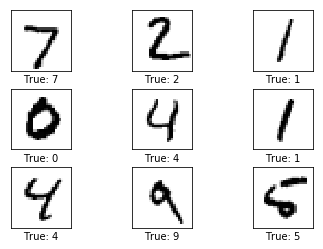

In [8]:
# Get the first images from the test-set.
images = X_test[0:9]

# Get the true classes for those images.
cls_true = Y_test_cls[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## One Hot Encoding

In [9]:
y_train_cls_char = Y_train_cls.astype(np.int)
y_val_cls_char = Y_val_cls.astype(np.int)
y_test_cls_char = Y_test_cls.astype(np.int)

Y_train_OHE = np.eye(10, dtype=float)[y_train_cls_char]
Y_val_OHE = np.eye(10, dtype=float)[y_val_cls_char]
Y_test_OHE = np.eye(10, dtype=float)[y_test_cls_char]

Y_test_OHE[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## TF-record (Optional)

[Referred this implementation to create tf.record](https://github.com/tensorflow/models/blob/master/research/slim/datasets/download_and_convert_mnist.py)

In [10]:
def int64_feature(values):
  if not isinstance(values, (tuple, list)):
    values = [values]
  return tf.train.Feature(int64_list=tf.train.Int64List(value=values))

In [11]:
def image_to_tfexample(image_data, image_format, height, width, class_id):
  return tf.train.Example(features=tf.train.Features(feature={
      'image/encoded':  tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_data])),
      'image/format':  tf.train.Feature(bytes_list=tf.train.BytesList(value=[image_format])),
      'image/class/label': int64_feature(class_id),
      'image/height': int64_feature(height),
      'image/width': int64_feature(width)
  }))

In [12]:
def _add_to_tfrecord(data_filename, labels_filename, num_images, tfrecord_writer, images, labels, dump):
    with tf.Graph().as_default():
        image = tf.placeholder(dtype=tf.uint8, shape=img_shape_storage)
        encoded_png = tf.image.encode_png(image)

        num_images = len(images)
        images = images.reshape(-1, img_w, img_h, 1)

        with tf.Session('') as sess:
            for j in range(num_images):
                sys.stdout.write('\r>> Converting image %d/%d' % (j + 1, num_images))
                sys.stdout.flush()

                png_string = sess.run(encoded_png, feed_dict={image: images[j]})
                example = image_to_tfexample(png_string, 'png'.encode(), img_w, img_h, labels[j])
                tfrecord_writer.write(example.SerializeToString())

                if dump == True:
                    pngFname = target + "/PNGs/" + "train_%d.png" % (j)
                    pngFile=open(pngFname,'wb')
                    pngFile.write(png_string);
                    pngFile.close()
                


In [13]:
x_train = download_img(x_train_url, x_train_file, target,16)
print("x_train Set", len(x_train))

y_train_cls = download_cls(y_train_url, y_train_file, target,8)
print("y_train_cls Set", len(y_train_cls))

x_test = download_img(x_test_url, x_test_file, target,16)
print("x_test Set", len(x_test))

y_test_cls = download_cls(y_test_url, y_test_file, target,8)
print("y_test_cls Set", len(y_test_cls))

print(len(x_train))

if not os.path.exists(training_recname):
    with tf.python_io.TFRecordWriter(training_recname) as tfrecord_writer:
        _add_to_tfrecord(x_train_rpath, y_train_rpath, 60000, tfrecord_writer, x_train, y_train_cls, False)

if not os.path.exists(testing_recname):
    with tf.python_io.TFRecordWriter(testing_recname) as tfrecord_writer:
        _add_to_tfrecord(x_test_rpath, y_test_rpath, 10000, tfrecord_writer, x_test, y_test_cls, False)

x_train Set 60000
y_train_cls Set 60000
x_test Set 10000
y_test_cls Set 10000
60000


## Main Function()

In [14]:
def parser(record):
    keys_to_features = {
        "image/encoded":  tf.FixedLenFeature([], tf.string),
        "image/format":  tf.FixedLenFeature([], tf.string),
        "image/class/label": tf.FixedLenFeature([], tf.int64),
        "image/height": tf.FixedLenFeature([], tf.int64),
        "image/width": tf.FixedLenFeature([], tf.int64)
    }

    parsed = tf.parse_single_example(record, keys_to_features)

    height = tf.cast(parsed["image/height"], tf.int32)
    width = tf.cast(parsed["image/width"], tf.int32)
    label = tf.cast(parsed["image/class/label"], tf.int32)
    image = tf.cast(tf.image.decode_png(parsed["image/encoded"], channels=1), tf.float32)
    
 
    return {'image': image}, label

In [15]:
def input_fn(filenames):
    
    BATCH_SIZE = 64
    THREADS = 4
    PREFETCH = 64
    
    dataset = tf.data.TFRecordDataset(filenames=filenames, num_parallel_reads=THREADS)
    dataset = dataset.apply(
        tf.contrib.data.shuffle_and_repeat(1024, 1)
    )
    dataset = dataset.apply(
        tf.contrib.data.map_and_batch(parser, BATCH_SIZE)
    )

    dataset = dataset.prefetch(buffer_size=PREFETCH)
    return dataset

In [16]:
def train_input_fn():
    return input_fn(filenames=[training_recname])

In [17]:
def val_input_fn():
    return input_fn(filenames=[testing_recname])

In [18]:
def fetch_all_val_images():

    BATCH_SIZE = 10000
    THREADS = 4

    dataset = tf.data.TFRecordDataset(filenames=[testing_recname], num_parallel_reads=THREADS)
    dataset = dataset.apply(
        tf.contrib.data.map_and_batch(parser, BATCH_SIZE)
    )

    return dataset

In [19]:
def cnn_model_fn(features, labels, mode, params):
    """Model function for CNN."""
    # Input Layer
    # Reshape X to 4-D tensor: [batch_size, width, height, channels]
    # MNIST images are 28x28 pixels, and have one color channel

    # Print all of the operations in the default graph.

    net = features["image"]

    net = tf.identity(net, name="input_tensor")

    net = tf.reshape(net, [-1, 28, 28, 1])

    # Convolutional Layer #1
    # Computes 32 features using a 5x5 filter with ReLU activation.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 28, 28, 1]
    # Output Tensor Shape: [batch_size, 28, 28, 32]
    conv1 = tf.layers.conv2d(inputs=net, filters=32,kernel_size=[5, 5],padding="same", activation=tf.nn.relu, name="conv1-layer")
    
    # Pooling Layer #1
    # First max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 28, 28, 32]
    # Output Tensor Shape: [batch_size, 14, 14, 32]
    pool1 = tf.layers.max_pooling2d(inputs=conv1, pool_size=[2, 2], strides=2, name="pool1-layer")

    # Convolutional Layer #2
    # Computes 64 features using a 5x5 filter.
    # Padding is added to preserve width and height.
    # Input Tensor Shape: [batch_size, 14, 14, 32]
    # Output Tensor Shape: [batch_size, 14, 14, 64]
    conv2 = tf.layers.conv2d(inputs=pool1,filters=64,kernel_size=[5, 5],padding="same",activation=tf.nn.relu, name="conv2-layer")

    # Pooling Layer #2
    # Second max pooling layer with a 2x2 filter and stride of 2
    # Input Tensor Shape: [batch_size, 14, 14, 64]
    # Output Tensor Shape: [batch_size, 7, 7, 64]
    pool2 = tf.layers.max_pooling2d(inputs=conv2, pool_size=[2, 2], strides=2, name="pool2-layer")

    # Flatten tensor into a batch of vectors
    # Input Tensor Shape: [batch_size, 7, 7, 64]
    # Output Tensor Shape: [batch_size, 7 * 7 * 64]
    pool2_flat = tf.reshape(pool2, [-1, 7 * 7 * 64])

    # Dense Layer
    # Densely connected layer with 1024 neurons
    # Input Tensor Shape: [batch_size, 7 * 7 * 64]
    # Output Tensor Shape: [batch_size, 1024]
    dense = tf.layers.dense(inputs=pool2_flat, units=1024, activation=tf.nn.relu, name="dense-layer")

    # Add dropout operation; 0.6 probability that element will be kept
    dropout = tf.layers.dropout(inputs=dense, rate=0.4, training=mode == tf.estimator.ModeKeys.TRAIN)

    # Logits layer
    # Input Tensor Shape: [batch_size, 1024]
    # Output Tensor Shape: [batch_size, 10]
    logits = tf.layers.dense(inputs=dropout, units=10)

    predictions = {
        "classes": tf.argmax(input=logits, axis=1), "probabilities": tf.nn.softmax(logits, name="softmax_tensor")
    }

    if mode == tf.estimator.ModeKeys.PREDICT:
        return tf.estimator.EstimatorSpec(mode=mode, predictions=predictions)

    # Calculate Loss (for both TRAIN and EVAL modes)
    loss = tf.losses.sparse_softmax_cross_entropy(labels=labels, logits=logits)

#     if mode == tf.estimator.ModeKeys.TRAIN:
#         # Call rewriter to produce graph with fake quant ops and folded batch norms
#         # quant_delay delays start of quantization till quant_delay steps, allowing
#         # for better model accuracy.
#         g = tf.get_default_graph()
#         tf.contrib.quantize.create_training_graph(input_graph=g, quant_delay=1000)

#     if mode == tf.estimator.ModeKeys.EVAL:
#         # Call the eval rewrite which rewrites the graph in-place with
#         # FakeQuantization nodes and fold batchnorm for eval.
#         g = tf.get_default_graph()
#         tf.contrib.quantize.create_eval_graph(input_graph=g)     


    # Configure the Training Op (for TRAIN mode)
    if mode == tf.estimator.ModeKeys.TRAIN:
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
        train_op = optimizer.minimize(loss=loss,global_step=tf.train.get_global_step())
        return tf.estimator.EstimatorSpec(mode=mode, loss=loss, train_op=train_op)

    # Add evaluation metrics (for EVAL mode)
    eval_metric_ops = {
        "accuracy": tf.metrics.accuracy(labels=labels, predictions=predictions["classes"])
    }

    return tf.estimator.EstimatorSpec(mode=mode, loss=loss, eval_metric_ops=eval_metric_ops)

In [20]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

if os.path.exists("02_QAT_MNIST"):
    tf.gfile.DeleteRecursively("02_QAT_MNIST");tf.gfile.MakeDirs("02_QAT_MNIST")
    tf.summary.FileWriterCache.clear()

model = tf.estimator.Estimator(model_fn=cnn_model_fn,
                               params={"learning_rate": 1e-4},
                               model_dir="02_QAT_MNIST")

import timeit

EPOCHS = 5
STEP_SIZE = 900
count = 0

while (count < EPOCHS):
    start_time = timeit.default_timer()
    model.train(input_fn=train_input_fn, steps=STEP_SIZE)
    elapsed = timeit.default_timer() - start_time
    sys.stdout.write("Time Take per Iternation of training is : {0:%}".format(elapsed))

    result = model.evaluate(input_fn=val_input_fn)
    #print(result)
    sys.stdout.write("Classification accuracy: {0:.2%}".format(result["accuracy"]))
    sys.stdout.flush()
    count = count + 1

# print("conv1-layer/bias", model.get_variable_value('conv1-layer/act_quant/conv1-layer/act_quant/min/biased'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/act_quant/conv1-layer/act_quant/min/local_step'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/act_quant/max'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/act_quant/min'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/bias'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/kernel'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/weights_quant/max'))
# print("conv1-layer/bias", model.get_variable_value('conv1-layer/weights_quant/min'))

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '02_QAT_MNIST', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f45fb2b75c0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use `tf.data.experimental.shuffle_and_repeat(...)`.
Instructions for updating:
Use `tf.data.experimental.map_and_batch

INFO:tensorflow:loss = 0.100378916, step = 3200 (0.189 sec)
INFO:tensorflow:global_step/sec: 525.222
INFO:tensorflow:loss = 0.028328758, step = 3300 (0.190 sec)
INFO:tensorflow:global_step/sec: 523.268
INFO:tensorflow:loss = 0.05341384, step = 3400 (0.191 sec)
INFO:tensorflow:global_step/sec: 528.359
INFO:tensorflow:loss = 0.012371156, step = 3500 (0.189 sec)
INFO:tensorflow:Saving checkpoints for 3600 into 02_QAT_MNIST/model.ckpt.
INFO:tensorflow:Loss for final step: 0.059472412.
Time Take per Iternation of training is : 221.222856%INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-01-15-06:39:19
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from 02_QAT_MNIST/model.ckpt-3600
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-01-15-06:39:19
INFO:tensorflow:Saving dict for global step 3600: accuracy = 0.982, global_step

In [21]:
def make_serving_input_receiver_fn():
    inputs = {'image': tf.placeholder(shape=[1,784], dtype=tf.float32, name='image')}
    return tf.estimator.export.build_raw_serving_input_receiver_fn(inputs)

if tf.gfile.Exists(export_dir):
        tf.gfile.DeleteRecursively(export_dir)

model.export_savedmodel(export_dir_base=export_dir,serving_input_receiver_fn=make_serving_input_receiver_fn(),as_text=False)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Signatures INCLUDED in export for Classify: None
INFO:tensorflow:Signatures INCLUDED in export for Regress: None
INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']
INFO:tensorflow:Signatures INCLUDED in export for Train: None
INFO:tensorflow:Signatures INCLUDED in export for Eval: None
INFO:tensorflow:Restoring parameters from 02_QAT_MNIST/model.ckpt-4500
Instructions for updating:
Pass your op to the equivalent parameter main_op instead.
INFO:tensorflow:Assets added to graph.
INFO:tensorflow:No assets to write.
INFO:tensorflow:SavedModel written to: ./02_QAT_MNIST/export/temp-b'1547534361'/saved_model.pb


b'./02_QAT_MNIST/export/1547534361'

In [22]:
saved_model_dir = os.path.join(export_dir, os.listdir(export_dir)[-1]) 

predictor_fn = tf.contrib.predictor.from_saved_model(
  export_dir = saved_model_dir)



INFO:tensorflow:Restoring parameters from ./02_QAT_MNIST/export/1547534361/variables/variables


Text(0.5, 1.0, 'Result: Pred. No. : 1')

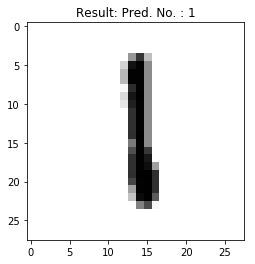

In [23]:
35
dir = target + "/PNGs/"
pngFname = dir + random.choice(os.listdir(dir))

pngFile=open(pngFname,'rb')
png_string = pngFile.read();
pngFile.close()

#sample = tf.cast(tf.image.decode_png(png_string, channels=1), tf.int8)
sample = tf.cast(tf.image.decode_png(png_string, channels=1), tf.float32)

a = np.ones(shape=(28,28,1),dtype=np.float32)    

img = tf.reshape(sample, [28, 28, 1])

with tf.Session() as sess:
    a = img.eval()

b = np.ones(shape=(1,784),dtype=np.float32)

b = a.reshape((1,784))

output = predictor_fn({'image': b})
#print(output)
#print ("train_data.shape: " + str(sample.get_shape()))
#print ("train_data.shape: " + str(img.get_shape()))

max = 0

for x in range(10):
    if output['probabilities'][0][x] >= output['probabilities'][0][max]:
        max = x

f, ax = plt.subplots()
ax.imshow(a.reshape(img_shape), cmap='binary')
xlabel = "Result: Pred. No. : {0}".format(max)
ax.set_title(xlabel)


In [24]:
# record_iterator = tf.python_io.tf_record_iterator(path=testing_recname)


# count = 0
# success = 0

# with tf.Session() as sess:
#     tf.train.start_queue_runners()

#     for string_record in record_iterator:
#         if count%100 == 0:
#             print("Success / Total: ", success, " / ", count, "Accuracy: {0:.2%}".format(success/(count+1)))

#         example = tf.train.Example()
#         example.ParseFromString(string_record)

#         sample = tf.cast(tf.image.decode_png(example.features.feature['image/encoded'].bytes_list.value[0], channels=1), tf.float32)
#         label = int(example.features.feature['image/class/label'].int64_list.value[0])

#         a = np.ones(shape=(28,28,1),dtype=np.float32)    

#         img = tf.reshape(sample, [28, 28, 1])

#         with sess.as_default():
#             a = img.eval()

#         b = np.ones(shape=(1,784),dtype=np.float32)

#         b = a.reshape((1,784))

#         output = predictor_fn({'image': b})

#         max = 0

#         for x in range(10):
#             if output['probabilities'][0][x] >= output['probabilities'][0][max]:
#                 max = x

#         if max == label:
#             success = success + 1

#         count = count + 1


In [25]:
saved_model_dir = os.path.join(export_dir, os.listdir(export_dir)[-1]) 

converter = tf.contrib.lite.TFLiteConverter.from_saved_model(saved_model_dir)

converter.inference_type = tf.contrib.lite.constants.QUANTIZED_UINT8
# converter.inference_input_type = tf.contrib.lite.constants.FLOAT
# converter.output_format = tf.contrib.lite.constants.GRAPHVIZ_DOT
converter.output_format = tf.contrib.lite.constants.TFLITE
input_arrays = converter.get_input_arrays()
converter.quantized_input_stats = {input_arrays[0] : (0, 1)}  # mean, std_dev
converter.default_ranges_stats = (-127,127)

tflite_model = converter.convert()

if (converter.output_format == tf.contrib.lite.constants.TFLITE):
    open("converted_model.tflite", "wb").write(tflite_model)

if (converter.output_format == tf.contrib.lite.constants.GRAPHVIZ_DOT):
    open("converted_model.graphdot", "wb").write(tflite_model)

INFO:tensorflow:Restoring parameters from ./02_QAT_MNIST/export/1547534361/variables/variables
INFO:tensorflow:The given SavedModel MetaGraphDef contains SignatureDefs with the following keys: {'serving_default'}
INFO:tensorflow:input tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: image
INFO:tensorflow: tensor name: image:0, shape: (-1, 784), type: DT_FLOAT
INFO:tensorflow:output tensors info: 
INFO:tensorflow:Tensor's key in saved_model's tensor_map: probabilities
INFO:tensorflow: tensor name: softmax_tensor:0, shape: (-1, 10), type: DT_FLOAT
INFO:tensorflow:Tensor's key in saved_model's tensor_map: classes
INFO:tensorflow: tensor name: ArgMax:0, shape: (-1), type: DT_INT64
INFO:tensorflow:Restoring parameters from ./02_QAT_MNIST/export/1547534361/variables/variables
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


output_data:  [[7]]


Text(0.5, 1.0, 'Result: Pred. No. : [[7]]')

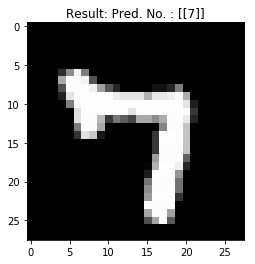

In [26]:
interpreter = tf.contrib.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

input_shape = input_details[0]['shape']

########################################################

dir = target + "/PNGs/"
pngFname = dir + random.choice(os.listdir(dir))

pngFile=open(pngFname,'rb')
png_string = pngFile.read();
pngFile.close()

sample = tf.cast(tf.image.decode_png(png_string, channels=1), tf.uint8)

a = np.ones(shape=(28,28,1),dtype=np.uint8)    

img = tf.reshape(sample, [1, 784])

with tf.Session() as sess:
    a = img.eval()

b = np.ones(shape=input_shape,dtype=np.uint8)
b = a.reshape(input_shape)

########################################################

input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)

with tf.Session() as sess:
    input_data = img.eval()

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])
print("output_data: ", output_data)

f, ax = plt.subplots()
ax.imshow(input_data.reshape(img_shape), cmap='gray')
xlabel = "Result: Pred. No. : {0}".format(output_data)
ax.set_title(xlabel)


In [27]:
import cv2

record_iterator = tf.python_io.tf_record_iterator(path=testing_recname)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)

interpreter.reset_all_variables()
interpreter = tf.contrib.lite.Interpreter(model_path="converted_model.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()


count = 0
success = 0

for string_record in record_iterator:
    if count%1000 == 0:
        print("Success / Total: ", success, " / ", count, "Accuracy: {0:.2%}".format(success/(count+1)))

    example = tf.train.Example()
    example.ParseFromString(string_record)

    label = int(example.features.feature['image/class/label'].int64_list.value[0])

#   sample = tf.cast(tf.image.decode_png(example.features.feature['image/encoded'].bytes_list.value[0], channels=1), tf.uint8)
    x = np.frombuffer(example.features.feature['image/encoded'].bytes_list.value[0], dtype='uint8')
    sample = cv2.imdecode(x, cv2.IMREAD_UNCHANGED).reshape(1,784);

    interpreter.set_tensor(input_details[0]['index'], sample)

    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])

    if output_data[0][0] == label:
        success = success + 1

    count = count + 1

print("Final : Success / Total: ", success, " / ", count, "Accuracy: {0:.2%}".format(success/(count+1)))


Success / Total:  0  /  0 Accuracy: 0.00%
Success / Total:  981  /  1000 Accuracy: 98.00%
Success / Total:  1950  /  2000 Accuracy: 97.45%
Success / Total:  2914  /  3000 Accuracy: 97.10%
Success / Total:  3898  /  4000 Accuracy: 97.43%
Success / Total:  4868  /  5000 Accuracy: 97.34%
Success / Total:  5860  /  6000 Accuracy: 97.65%
Success / Total:  6847  /  7000 Accuracy: 97.80%
Success / Total:  7843  /  8000 Accuracy: 98.03%
Success / Total:  8838  /  9000 Accuracy: 98.19%
Final : Success / Total:  9821  /  10000 Accuracy: 98.20%


In [28]:
    keys_to_features = {
        "image/encoded":  tf.FixedLenFeature([], tf.string),
        "image/format":  tf.FixedLenFeature([], tf.string),
        "image/class/label": tf.FixedLenFeature([], tf.int64),
        "image/height": tf.FixedLenFeature([], tf.int64),
        "image/width": tf.FixedLenFeature([], tf.int64)
    }
